# Data Analysis and Visualization

In [1]:
import polars as pl
import polars.selectors as cs

# Read the CSV file into a Polars DataFrame
df = pl.read_csv("../data/penguins_size.csv")

# Check for null values
null_counts = df.null_count()
print("Null counts before imputation:")
print(null_counts)

Null counts before imputation:
shape: (1, 7)
┌─────────┬────────┬──────────────────┬─────────────────┬───────────────────┬─────────────┬─────┐
│ species ┆ island ┆ culmen_length_mm ┆ culmen_depth_mm ┆ flipper_length_mm ┆ body_mass_g ┆ sex │
│ ---     ┆ ---    ┆ ---              ┆ ---             ┆ ---               ┆ ---         ┆ --- │
│ u32     ┆ u32    ┆ u32              ┆ u32             ┆ u32               ┆ u32         ┆ u32 │
╞═════════╪════════╪══════════════════╪═════════════════╪═══════════════════╪═════════════╪═════╡
│ 0       ┆ 0      ┆ 0                ┆ 0               ┆ 0                 ┆ 0           ┆ 0   │
└─────────┴────────┴──────────────────┴─────────────────┴───────────────────┴─────────────┴─────┘


In [2]:
na_string_counts = {col: df.filter(pl.col(col) == "NA").shape[0] for col in df.columns}
print("NA string counts before imputation:", na_string_counts)

NA string counts before imputation: {'species': 0, 'island': 0, 'culmen_length_mm': 2, 'culmen_depth_mm': 2, 'flipper_length_mm': 2, 'body_mass_g': 2, 'sex': 10}


In [3]:
df.filter(pl.col("culmen_length_mm") == "NA")

species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
str,str,str,str,str,str,str
"""Adelie""","""Torgersen""","""NA""","""NA""","""NA""","""NA""","""NA"""
"""Gentoo""","""Biscoe""","""NA""","""NA""","""NA""","""NA""","""NA"""


In [4]:
cleaned_df = df.filter(pl.col("culmen_length_mm") != "NA")

In [5]:
cleaned_df.describe()

statistic,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
str,str,str,str,str,str,str,str
"""count""","""342""","""342""","""342""","""342""","""342""","""342""","""342"""
"""null_count""","""0""","""0""","""0""","""0""","""0""","""0""","""0"""
"""mean""",null,null,null,null,null,null,null
"""std""",null,null,null,null,null,null,null
"""min""","""Adelie""","""Biscoe""","""32.1""","""13.1""","""172""","""2700""","""."""
"""25%""",null,null,null,null,null,null,null
"""50%""",null,null,null,null,null,null,null
"""75%""",null,null,null,null,null,null,null
"""max""","""Gentoo""","""Torgersen""","""59.6""","""21.5""","""231""","""6300""","""NA"""


In [6]:
# Remove the 'sex' column
cleaned_df = cleaned_df.drop("sex")

# Display the first few rows to verify the column removal
print(cleaned_df.head())

shape: (5, 6)
┌─────────┬───────────┬──────────────────┬─────────────────┬───────────────────┬─────────────┐
│ species ┆ island    ┆ culmen_length_mm ┆ culmen_depth_mm ┆ flipper_length_mm ┆ body_mass_g │
│ ---     ┆ ---       ┆ ---              ┆ ---             ┆ ---               ┆ ---         │
│ str     ┆ str       ┆ str              ┆ str             ┆ str               ┆ str         │
╞═════════╪═══════════╪══════════════════╪═════════════════╪═══════════════════╪═════════════╡
│ Adelie  ┆ Torgersen ┆ 39.1             ┆ 18.7            ┆ 181               ┆ 3750        │
│ Adelie  ┆ Torgersen ┆ 39.5             ┆ 17.4            ┆ 186               ┆ 3800        │
│ Adelie  ┆ Torgersen ┆ 40.3             ┆ 18              ┆ 195               ┆ 3250        │
│ Adelie  ┆ Torgersen ┆ 36.7             ┆ 19.3            ┆ 193               ┆ 3450        │
│ Adelie  ┆ Torgersen ┆ 39.3             ┆ 20.6            ┆ 190               ┆ 3650        │
└─────────┴───────────┴─────────────

In [7]:
cleaned_df.select(pl.col("species")).unique()

species
str
"""Chinstrap"""
"""Gentoo"""
"""Adelie"""


In [8]:
cleaned_df = cleaned_df.with_columns(pl.col("species").cast(pl.Categorical).cast(pl.UInt32).cast(pl.Int32).alias("species_encoded"), pl.col("island").cast(pl.Categorical).cast(pl.UInt32).cast(pl.Int32).alias("island_encoded"), pl.col("culmen_length_mm").cast(pl.Float64), pl.col("culmen_depth_mm").cast(pl.Float64), pl.col("flipper_length_mm").cast(pl.Float64), pl.col("body_mass_g").cast(pl.Float64))

In [9]:
cleaned_df.head(5)

species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_encoded,island_encoded
str,str,f64,f64,f64,f64,i32,i32
"""Adelie""","""Torgersen""",39.1,18.7,181.0,3750.0,0,0
"""Adelie""","""Torgersen""",39.5,17.4,186.0,3800.0,0,0
"""Adelie""","""Torgersen""",40.3,18.0,195.0,3250.0,0,0
"""Adelie""","""Torgersen""",36.7,19.3,193.0,3450.0,0,0
"""Adelie""","""Torgersen""",39.3,20.6,190.0,3650.0,0,0


In [10]:
cleaned_df.describe()

statistic,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_encoded,island_encoded
str,str,str,f64,f64,f64,f64,f64,f64
"""count""","""342""","""342""",342.0,342.0,342.0,342.0,342.0,342.0
"""null_count""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",null,null,43.92193,17.15117,200.915205,4201.754386,0.918129,1.21345
"""std""",null,null,5.459584,1.974793,14.061714,801.954536,0.892635,0.683741
"""min""","""Adelie""","""Biscoe""",32.1,13.1,172.0,2700.0,0.0,0.0
"""25%""",null,null,39.2,15.6,190.0,3550.0,0.0,1.0
"""50%""",null,null,44.5,17.3,197.0,4050.0,1.0,1.0
"""75%""",null,null,48.5,18.7,213.0,4750.0,2.0,2.0
"""max""","""Gentoo""","""Torgersen""",59.6,21.5,231.0,6300.0,2.0,2.0


In [11]:
category_mapping = cleaned_df['species'].to_dummies().columns
category_mapping

['species_Adelie', 'species_Chinstrap', 'species_Gentoo']

## Understanding Categorical Encoding in Polars

When converting categorical columns to numeric representations with Polars, it's important to understand how the categorical values are mapped to integers. Let's see how our encoded species values map to the original categories:

In [ ]:
# Let's see the unique categorical values and their encoded integers
# For 'species' column
species_categories = cleaned_df.select('species').unique().sort('species')
species_encoded = cleaned_df.select('species_encoded').unique().sort('species_encoded')

# Create a DataFrame that shows the mapping
species_mapping = pl.DataFrame({
    'species': species_categories['species'],
    'encoded_value': species_encoded['species_encoded']
})

species_mapping

In [ ]:
# Same for 'island' column
island_categories = cleaned_df.select('island').unique().sort('island')
island_encoded = cleaned_df.select('island_encoded').unique().sort('island_encoded')

# Create a DataFrame that shows the mapping
island_mapping = pl.DataFrame({
    'island': island_categories['island'],
    'encoded_value': island_encoded['island_encoded']
})

island_mapping

### How Polars Handles Categorical Encoding

When using `pl.col("column").cast(pl.Categorical).cast(pl.UInt32)` in Polars:

1. First, the string column is converted to a Categorical data type
2. Then, the Categorical is converted to integer indices (starting from 0)
3. The mapping is determined by the lexicographical (alphabetical) order of the original categories

For our dataset:
- Species: Adelie → 0, Chinstrap → 1, Gentoo → 2
- Island: Biscoe → 0, Dream → 1, Torgersen → 2

This is important to know when interpreting model outputs or preparing one-hot encoded features.

In [ ]:
# Let's verify this with another approach
# We can use the value_counts method to see all values with their counts
print("Species value counts with corresponding encoded values:")
species_counts = cleaned_df.select(['species', 'species_encoded']).group_by(['species', 'species_encoded']).count()
species_counts

### Visualizing the Categorical Distribution

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a countplot to visualize the species distribution
plt.figure(figsize=(10, 6))
species_counts_pd = species_counts.to_pandas()
sns.barplot(x='species', y='count', data=species_counts_pd, palette='viridis')
for i, row in enumerate(species_counts_pd.itertuples()):
    plt.text(i, row.count/2, f"Encoded as: {row.species_encoded}", 
             ha='center', va='center', color='white', fontweight='bold')
    
plt.title('Penguin Species Distribution with Encoded Values')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

In [12]:
# Select numerical columns for correlation analysis
numerical_cols = cleaned_df.select(cs.numeric().exclude(['species_encoded', 'island_encoded'])).columns

# Calculate the correlation matrix
correlation_matrix = cleaned_df.select(numerical_cols).corr()# Convert Polars DataFrame to Pandas DataFrame for seaborn compatibility
correlation_matrix 

culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
f64,f64,f64,f64
1.0,-0.235053,0.656181,0.59511
-0.235053,1.0,-0.583851,-0.471916
0.656181,-0.583851,1.0,0.871202
0.59511,-0.471916,0.871202,1.0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into features (X) and target (y)
X = cleaned_df.select([
    "culmen_length_mm", 
    "culmen_depth_mm", 
    "flipper_length_mm", 
    "body_mass_g"
]).to_numpy()
y = cleaned_df.select('species_encoded').to_numpy().flatten()


# Add this before train/test split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Then use X_scaled in your train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [14]:
X_train

array([[-9.39528498e-01,  2.47630774e-02, -1.48956593e+00,
        -5.01703051e-01],
       [ 6.19647927e-01, -1.69945886e+00,  1.07432835e+00,
         6.53418930e-01],
       [-1.50816931e+00, -7.66617426e-02, -8.48592365e-01,
        -1.06365429e+00],
       [-4.25917440e-01,  4.30462357e-01, -6.34934508e-01,
        -3.14385973e-01],
       [-9.76215002e-01, -7.66617426e-02, -9.19811650e-01,
        -1.62560552e+00],
       [-1.10461777e+00,  7.34736817e-01, -5.63715222e-01,
        -1.59438601e+00],
       [ 4.54558659e-01, -7.86635483e-01,  1.43042477e+00,
         9.96833573e-01],
       [-1.12296102e+00,  7.54754874e-02, -1.48956593e+00,
        -6.26581103e-01],
       [ 1.48178077e+00,  9.37586457e-01, -2.78838080e-01,
        -6.46298690e-02],
       [ 1.18828874e+00, -9.38772713e-01,  1.64408263e+00,
         1.68366286e+00],
       [ 6.19647927e-01, -9.38772713e-01,  1.50164406e+00,
         1.30902870e+00],
       [ 7.11364187e-01, -1.09090994e+00,  1.00310906e+00,
      

# Multi-class Classification Model

In [15]:
import os 
os.environ["KERAS_BACKEND"] = "jax"
import keras

In [16]:
keras.backend.backend()

'jax'

In [17]:
def penguin_species_model(input_shape) -> keras.Model:
    inputs = keras.Input(shape=input_shape)
    x = keras.layers.Dense(64, activation="relu")(inputs)
    # x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Dropout(0.3)(x)
    x = keras.layers.Dense(64, activation="relu")(x)
    # x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Dropout(0.3)(x)
    outputs = keras.layers.Dense(3, activation="softmax")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [18]:
model = penguin_species_model(X_train.shape[1:])

In [19]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,675 (18.26 KB)

 Trainable params: 4,675 (18.26 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [21]:
hist = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=100,
    validation_data=(X_val, y_val),
    callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)],
)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - loss: 0.8117 - sparse_categorical_accuracy: 0.5679 - val_loss: 0.2219 - val_sparse_categorical_accuracy: 0.8986
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2012 - sparse_categorical_accuracy: 0.9130 - val_loss: 0.0398 - val_sparse_categorical_accuracy: 1.0000
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1064 - sparse_categorical_accuracy: 0.9684 - val_loss: 0.0144 - val_sparse_categorical_accuracy: 1.0000
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0710 - sparse_categorical_accuracy: 0.9737 - val_loss: 0.0128 - val_sparse_categorical_accuracy: 1.0000
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0273 - sparse_categorical_accuracy: 0.9924 - val_loss: 0.0153 - val_sparse_categorical_accuracy: 0.9855
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 0.0237 - sparse_categorical_accuracy: 0.9806 - val_loss: 0.0129 - val_sparse_categorical_accuracy: 0.9855
Epoch 7/100
7/7 ━━

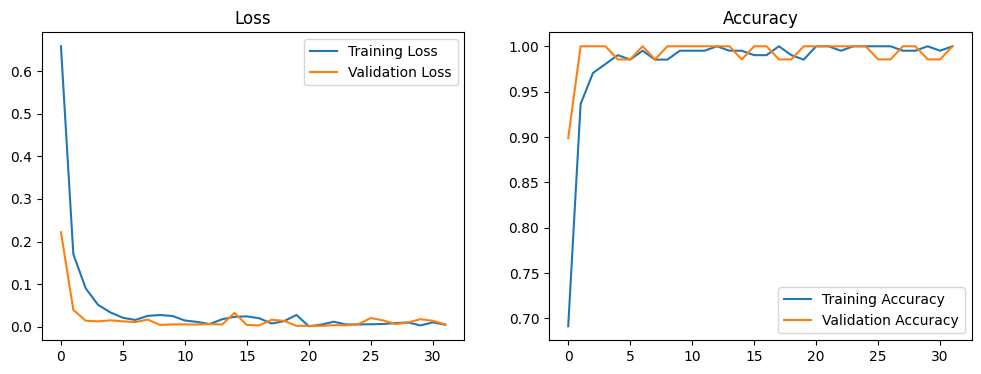

In [22]:
# Evaluate on test set

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(hist.history['sparse_categorical_accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()